<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session3_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment - 2**

####  **Objective** - Classify emails as spam or not spam using the [Spambase](https://archive.ics.uci.edu/static/public/94/data.csv) dataset, which contains the frequency of occurrence of 57 entities (words and characters) (in %) from 4601 spam and non-spam emails and corresponding class labels.  

Spam Classification with Logistic Regression











In [ ]:
!pip install ucimlrepo

In [54]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# spambase = fetch_ucirepo(id=94)

# # data (as pandas dataframes)
# X = spambase.data.features
# y = spambase.data.targets

# # metadata
# print(spambase.metadata)

# # variable information
# print(spambase.variables)

<font color='blue'>Task 1: Load the Spambase Dataset</font> [Marks - 1]

- Load the Spambase dataset using Pandas.
- Display the first few rows to understand the structure of the data.

In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://archive.ics.uci.edu/static/public/94/data.csv")
dataset = pd.DataFrame(df)
dataset.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


<font color='blue'>Task 2: Check for Duplicate Entries and Missing Values</font> [Marks - 1]

- Check if there are duplicate entries in the dataset.
- Remove any duplicate entries.
- Check for missing values in the dataset.
- Remove entries with missing feature values.

In [72]:
#check for duplicate entries
duplicateEnteris = dataset.duplicated().sum()
print("Number of duplicate entries is: ", duplicateEnteris)

Number of duplicate entries is:  391


In [73]:
#remove all the duplicate entries
dataset.drop_duplicates(inplace=True)

In [74]:
#verify for duplicate entries
print("Number of duplicate entries is: ", dataset.duplicated().sum())

Number of duplicate entries is:  0


In [75]:
# Check for missing values in the Dataset
mising_val = dataset.isnull().sum()
print("No. of missing val. in each column: ", mising_val)




No. of missing val. in each column:  word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
wor

In [76]:
#Remove entries with missing feature values.
dataset.dropna(inplace=True)


<font color='blue'>Task 3: Preprocess the Dataset</font> [Marks - 1]

- Preprocess the dataset as required:
- Perform feature scaling or standardization on the features.

In [77]:
#seperate features and target
x = dataset.drop(columns=['Class'])
y = dataset['Class']

#Initialize StandardScalar
scaler = StandardScaler()

#Fit and Transform the features
x_scaled = scaler.fit_transform(x)

#convert x_scaled back to DataFrame
x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)

<font color='blue'>Task 4: Check Dataset Balance</font> [Marks - 1]

- Determine if the dataset is balanced or imbalanced by analyzing the distribution of the target variable.


In [78]:
y.value_counts()

,count
Class,
0,2531
1,1679


 Number of data for both class (0 and 1) is not equal in count as number of data for class 0 and class 1 is 2531 and 1679 so the Dataset is imbalanced.

---



<font color='blue'>Task 5: Split the Data</font> [Marks - 1]

- Split the data into training, validation, and test sets with the following proportions:
  - Training set: 70%
  - Validation set: 15%
  - Test set: 15%

In [79]:
#Split the data into training, validation and test set
X_train, X_temp, Y_train, Y_temp = train_test_split(x_scaled_df, y, test_size = 0.3, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 42)



<font color='blue'>Task 6: Implement Logistic Regression from Scratch</font> [Marks - 8]

- Implement a logistic regression model from scratch using:
  - Cross-entropy loss as the cost function.
  - Gradient descent as the learning algorithm.
  - L1 regularization in the cost function.
- Train the logistic regression model using gradient descent.
- Choose appropriate values for the learning rate and regularization parameter through cross-validation.

In [80]:
class ScratchLogisticRegression:

  def __init__(self, learning_rate=0.01, lamda=0.1, iterations=1000):
    self.learning_rate = learning_rate
    self.lamda = lamda
    self.iterations = iterations


  def sigmoid_fun(self, z):
    return 1 / (1 + np.exp(-z))



  def computeCost(self, X, Y, weights):
    #no of training sample
    m = len(Y)
    #predicted probabilities
    predictions = self.sigmoid_fun(np.dot(X, weights))
    #cross-entropy loss
    cost = (-1/m) * (np.dot(Y, np.log(predictions + 1e-8)) + np.dot((1-Y), np.log(1-predictions + 1e-8)))
    # L1 regularization
    L1_regularization = (self.lamda / (2 *  m)) * np.sum(np.abs(weights))
    #total cost
    total_cost = cost + L1_regularization
    return total_cost


  def gradientDescent(self, X, Y, weights):
    m = len(Y)
    predictions = self.sigmoid_fun(np.dot(X, weights))
    #gradient of loss function
    lossFunction_gradient = (1 / m) * np.dot(X.T, (predictions - Y))
    #gradient of regularization
    regularization_gradient = (self.lamda / m) * np.sign(weights)
    #totatl gradient is sum of gradient of loss function and gradient of regularization
    gradient = lossFunction_gradient + regularization_gradient
    return gradient


  def fit(self, X, Y):
     #initialize weights
    self.weights = np.zeros(X.shape[1])
    for _ in range(self.iterations):
      gradient = self.gradientDescent(X, Y, self.weights)
      self.weights = self.weights - (self.learning_rate * gradient)


  def predict(self, X):
    predictions = self.sigmoid_fun(np.dot(X, self.weights))
    return np.round(predictions)





In [82]:
 #train the model
scratch_model = ScratchLogisticRegression(learning_rate=0.01, lamda=0.1, iterations=1000)
scratch_model.fit(X_train, Y_train)

#predict on validation set
y_val_pred = scratch_model.predict(X_val)
accuracy = accuracy_score(Y_val, y_val_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9112519809825673


In [102]:
#Choose appropriate values for the learning rate and regularization parameter through cross-validation.
# Hyperparameter tunning


learing_rates = [0.0001, 0.001, 0.01, 0.1, 1]
lamda_values = [0.0001, 0.001, 0.01, 0.1, 1]
best_params = {}
best_accuracy = 0

for learningRate in learing_rates:
  for lamda in lamda_values:
    scratch_model = ScratchLogisticRegression(learning_rate=learningRate, lamda=lamda, iterations=1000)
    scratch_model.fit(X_train, Y_train)
    #prediction on validation set
    y_pred = scratch_model.predict(X_val)
    accuracy = accuracy_score(Y_val, y_pred)

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_params['learning_rate'] = learningRate
      best_params['lamda'] = lamda

print("Best parameters: ", best_params)
print("Best accuracy: ", best_accuracy)



Best parameters:  {'learning_rate': 1, 'lamda': 1}
Best accuracy:  0.9207606973058637


<font color='blue'>Task 7: Evaluate Model Performance</font> [Marks - 2]

- Evaluate the performance of your logistic regression model on the test set using:
  - Confusion matrix.
  - Precision.
  - Recall.
  - Area under the Precision-Recall Curve (AUC-PR).


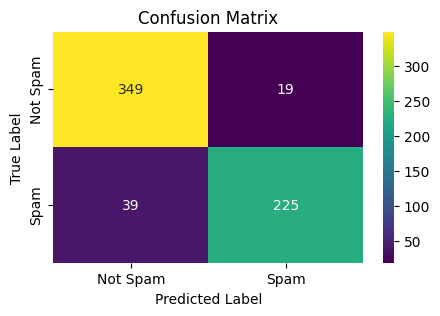

Precision: 0.9221
Recall: 0.8523
Area under the Precision-Recall Curve (AUC-PR): 0.9463


In [103]:
#train the model on best value of hyperparameter
scratch_model = ScratchLogisticRegression(learning_rate=0.1, lamda=1, iterations=1000)
scratch_model.fit(X_train, Y_train)

#predict on Test set
y_test_pred = scratch_model.predict(X_test)

#compute confusion matrix
confusionMatrix_scratch = confusion_matrix(Y_test, y_test_pred)

#plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusionMatrix_scratch, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#compute precision
precision_scratch = precision_score(Y_test, y_test_pred)
print(f"Precision: {precision_scratch:.4f}")

#compute recall
recall_scratch = recall_score(Y_test, y_test_pred)
print(f"Recall: {recall_scratch:.4f}")

#Area under the Precision-Recall Curve (AUC-PR)
y_test_probabilities_scratch = scratch_model.sigmoid_fun(np.dot(X_test, scratch_model.weights))

auc_pr_scratch = average_precision_score(Y_test, y_test_probabilities_scratch)
print(f"Area under the Precision-Recall Curve (AUC-PR): {auc_pr_scratch:.4f}")

<font color='blue'>Task 8: Compare with Scikit-Learn</font> [Marks - 5]

- Fit a logistic regression model using scikit-learn.
- Compare the performance of your implementation with the scikit-learn model by evaluating:
  - Confusion matrix.
  - Precision.
  - Recall.
  - Area under the Precision-Recall Curve (AUC-PR).
- Compare the AUC-PR values between your implementation and scikit-learn's implementation.

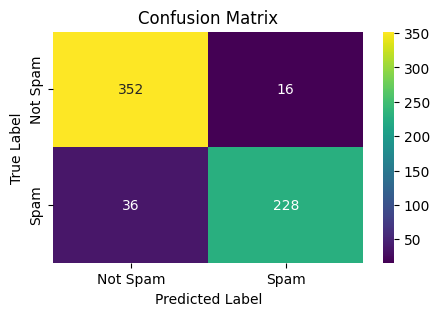

Precision: 0.9344
Recall: 0.8636
Area under the Precision-Recall Curve (AUC-PR): 0.9492


In [104]:
#initialize scikit-learn logistic regression with L1 regularization
sklearn_model = SKLogisticRegression(penalty='l1', solver='liblinear', C=1, max_iter=1000)

#fit the model on training data
sklearn_model.fit(X_train, Y_train)

y_test_pred = sklearn_model.predict(X_test)

#compute confusion matrix
confusionMatrix_sklearn = confusion_matrix(Y_test, y_test_pred)

#plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusionMatrix_sklearn, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#compute precision
precision_sklearn = precision_score(Y_test, y_test_pred)
print(f"Precision: {precision_sklearn:.4f}")

#compute recall
recall_sklearn = recall_score(Y_test, y_test_pred)
print(f"Recall: {recall_sklearn:.4f}")

#Area under the Precision-Recall Curve (AUC-PR)
y_test_probabilities_sklearn = sklearn_model.predict_proba(X_test)[:, 1]

auc_pr_sklearn = average_precision_score(Y_test, y_test_probabilities_sklearn)
print(f"Area under the Precision-Recall Curve (AUC-PR): {auc_pr_sklearn:.4f}")

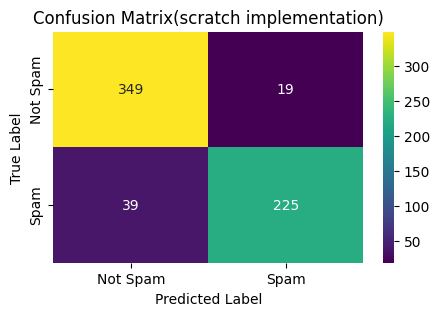

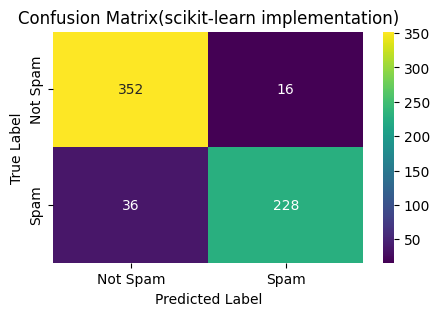


Precision for scratch implementation: 0.9221
precision for scikit-learn implementation: 0.9344

recall for scratch implementation: 0.8523
Recall for scikit-learn implementation: 0.8636

Area under the Precision-Recall Curve (AUC-PR) for scratch implementation: 0.9492
Area under the Precision-Recall Curve (AUC-PR) for scikit-learn implementation: 0.9492


In [106]:
#comparision implementation with scratch and scikit-learn

#confusion matrix comparision
#plot confusion matrix for scratch implementation
plt.figure(figsize=(5, 3))
sns.heatmap(confusionMatrix_scratch, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix(scratch implementation)')
plt.show()

#plot confusion matrix for scikit-learn implementation
plt.figure(figsize=(5, 3))
sns.heatmap(confusionMatrix_sklearn, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix(scikit-learn implementation)')
plt.show()

#precision for scratch implementation
print(f"\nPrecision for scratch implementation: {precision_scratch:.4f}")

#precision for scikit-learn implementation
print(f"precision for scikit-learn implementation: {precision_sklearn:.4f}")

#recall for scratch implementation
print(f"\nrecall for scratch implementation: {recall_scratch:.4f}")

#recall for scikit-learn implementation
print(f"Recall for scikit-learn implementation: {recall_sklearn:.4f}")

#Area under the Precision-Recall Curve (AUC-PR) for scratch implementation
print(f"\nArea under the Precision-Recall Curve (AUC-PR) for scratch implementation: {auc_pr_sklearn:.4f}")

#Area under the Precision-Recall Curve (AUC-PR) for scikit-learn implementation
print(f"Area under the Precision-Recall Curve (AUC-PR) for scikit-learn implementation: {auc_pr_sklearn:.4f}")

